**Progetto Machine Learning**

Partecipanti
- Fiorentini Nicolò  933157
- Anoir Kadmiri 933097


In questo progetto si propone l'analisi di un dataset, applicazione di tecniche di formattazione e di trasformazione dei dati. Successivamente abbiamo una implementazione alcuni modelli e per concludere abbiamo un confronto delle performance tra i differenti modelli applicati. Dopo una fase iniziale di esplorazione, i dati vengono puliti e normalizzati per garantire qualità e coerenza. Successivamente, vengono applicati di machine learning per individuare pattern, effettuare previsioni. L’obiettivo finale è fornire un confronto tra i modelli applicati, misurandone le perfomance e l'efficenza.









ANALISI DEL DATASET

In [1]:
#Diamo accesso al nostro google drive che conterrà il dataset che utilizzeremo
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sn
import requests
import seaborn as sns

#drive.mount('/content/drive/')
#df = pd.read_csv("drive/MyDrive/Dataset/diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv")
url = "https://raw.githubusercontent.com/NIKFIORE/Progetto-Machine-Learning/refs/heads/main/Dataset/Cancer_Data.csv"
# Carica il dataset direttamente da GitHub
df = pd.read_csv(url)
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df.drop(columns=["id"], inplace= True)
df.drop(columns=["Unnamed: 32"], inplace= True)
df.dtypes

,0
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


In [3]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
# Verifico se ci sono valori mancanti
missing_value = df.isnull().values.any()

# Definisco x prima di usarlo
if not missing_value:
    x = "non"
else:
    x = ""

print(f"Questo dataset {x} ha valori mancanti")

Questo dataset non ha valori mancanti


In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# Controlla i valori unici nella colonna 'diagnosis'
print(df['diagnosis'].unique())

['M' 'B']


In [7]:
# Mappatura della colonna 'diagnosis'
df["diagnosis"] = df["diagnosis"].map({'B': 0, 'M': 1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
numeric_columns = list(df.select_dtypes(include=['int64', 'float64']).columns)
print(numeric_columns)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


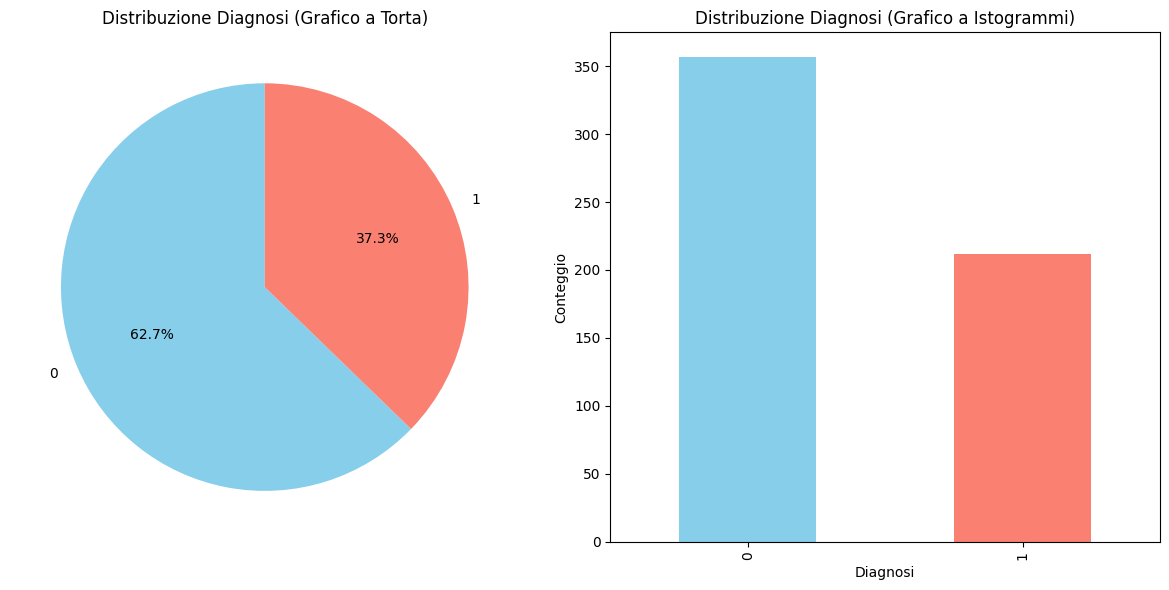

In [10]:
# Plot a torta
plt.figure(figsize=(12, 6))

# Subplot 1: Grafico a torta
plt.subplot(1, 2, 1)
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribuzione Diagnosi (Grafico a Torta)')
plt.ylabel('')

# Subplot 2: Grafico a istogrammi
plt.subplot(1, 2, 2)
df['diagnosis'].value_counts().plot.bar(color=['skyblue', 'salmon'])
plt.title('Distribuzione Diagnosi (Grafico a Istogrammi)')
plt.xlabel('Diagnosi')
plt.ylabel('Conteggio')

# Mostra il grafico
plt.tight_layout()
plt.show()

Analisi univariante

L'analisi si riferisce all'esplorazione statistica e grafica di ciascuna variabile numerica separatamente, senza considerare relazioni tra più variabili.Questa analisi è utile per comprendere la distribuzione e la variabilità dei dati prima di passare a metodi più complessi come l'analisi multivariata.

In [11]:
numeric_data = df[numeric_columns]

# Statistiche descrittive
print("\nStatistiche descrittive:")
print(numeric_data.describe())


Statistiche descrittive:
        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052

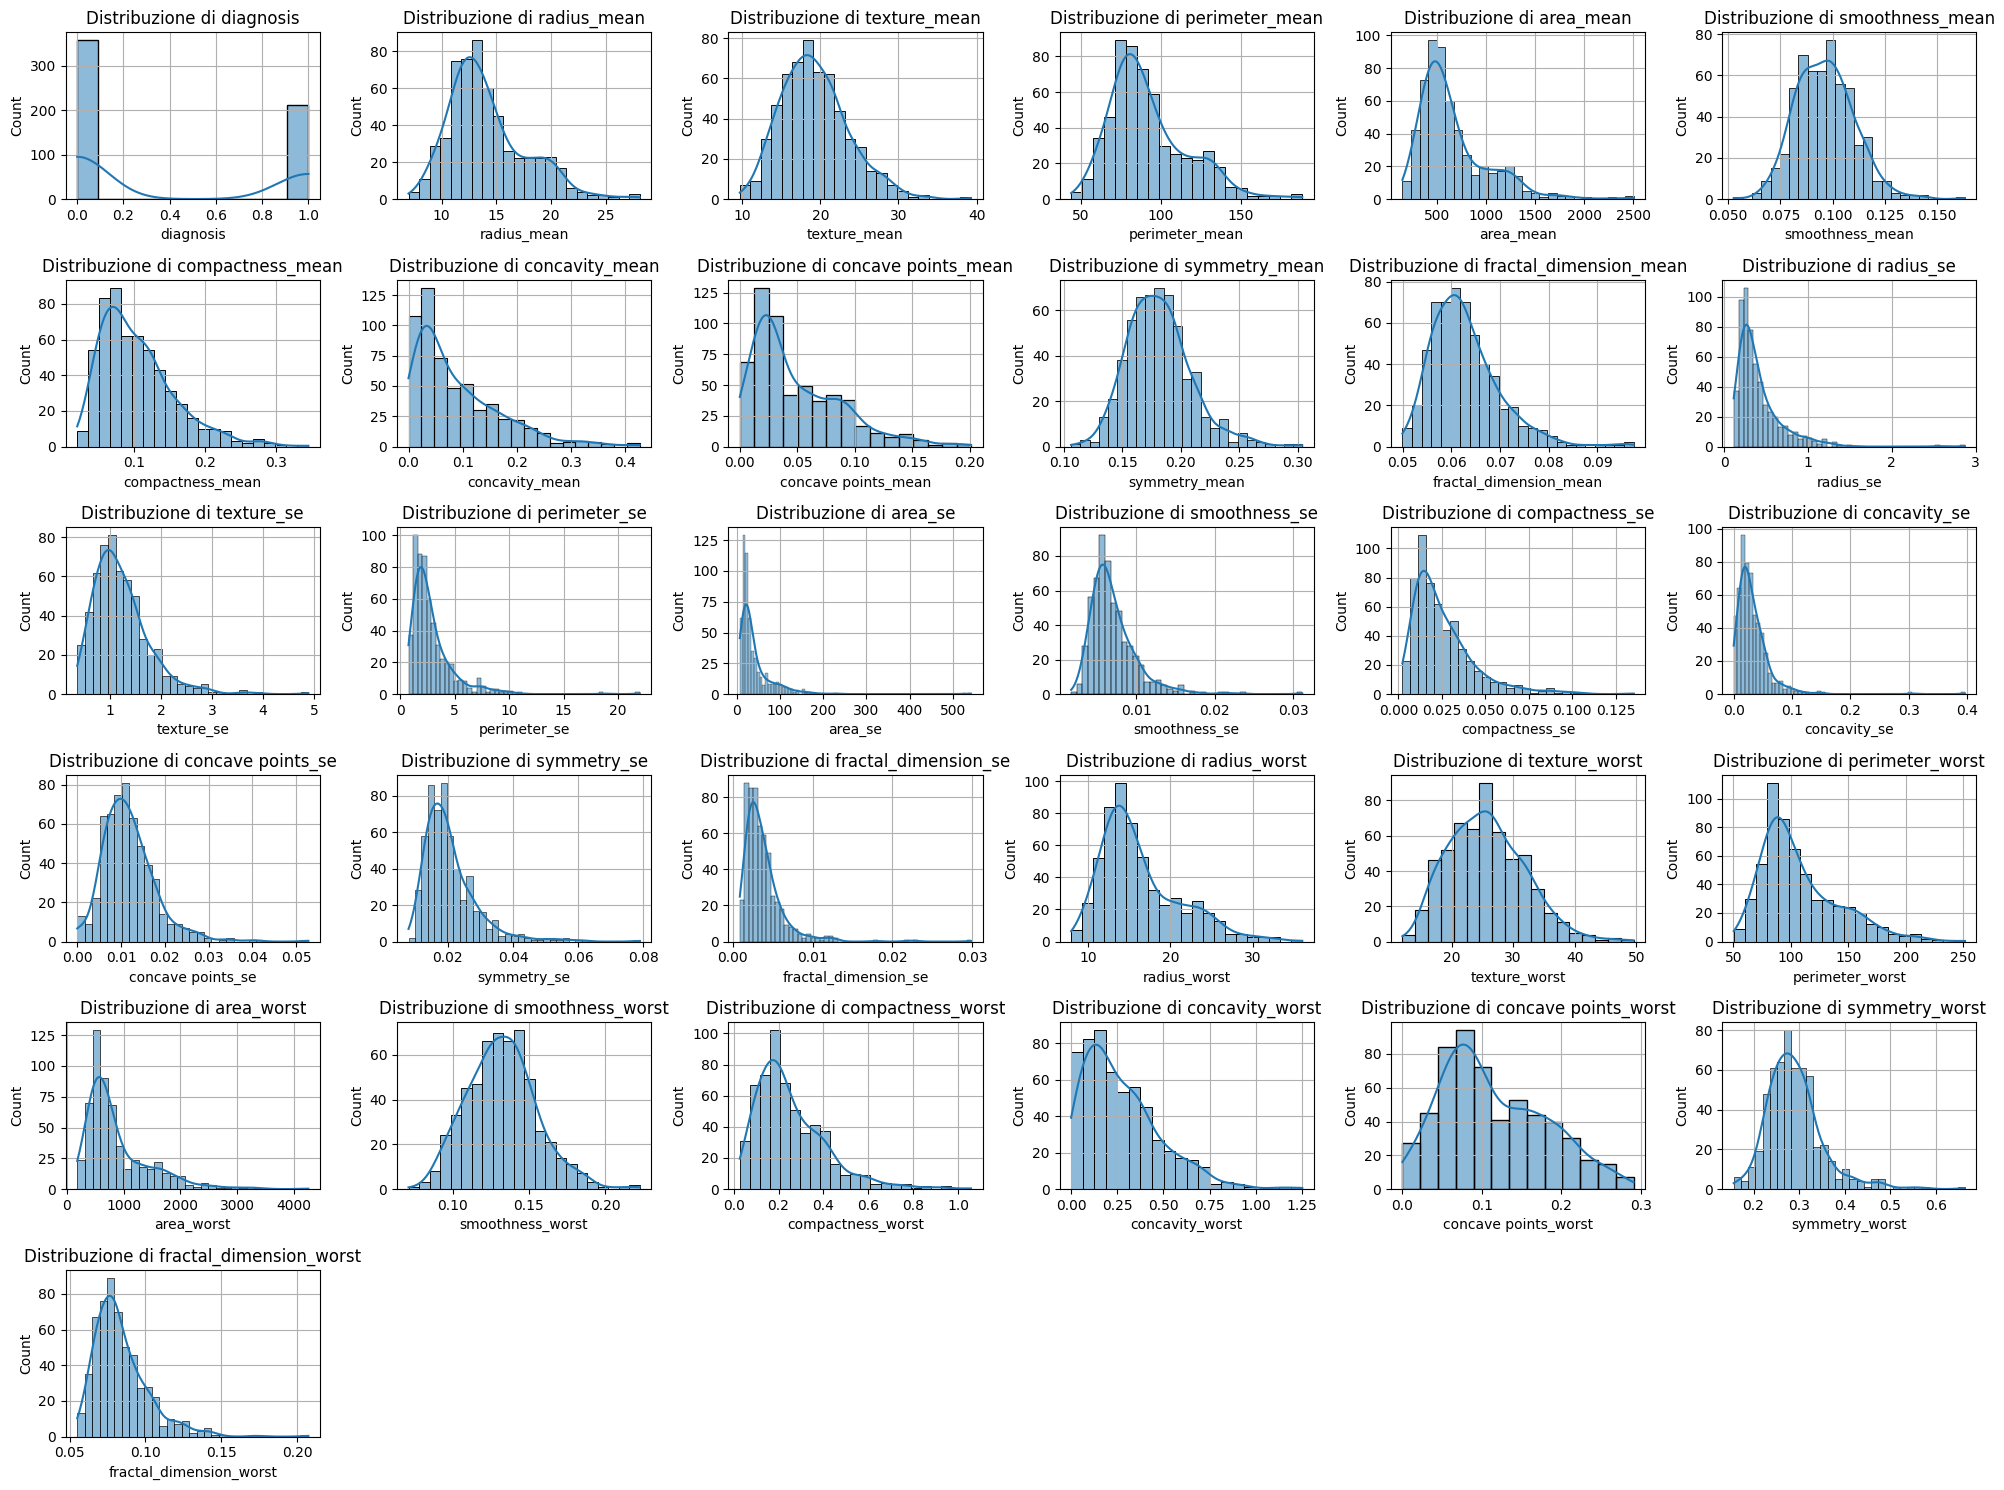

In [12]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(6, 6, i+1)
    # Istogramma
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuzione di {column}')
    plt.grid(True)

plt.tight_layout()
plt.show()

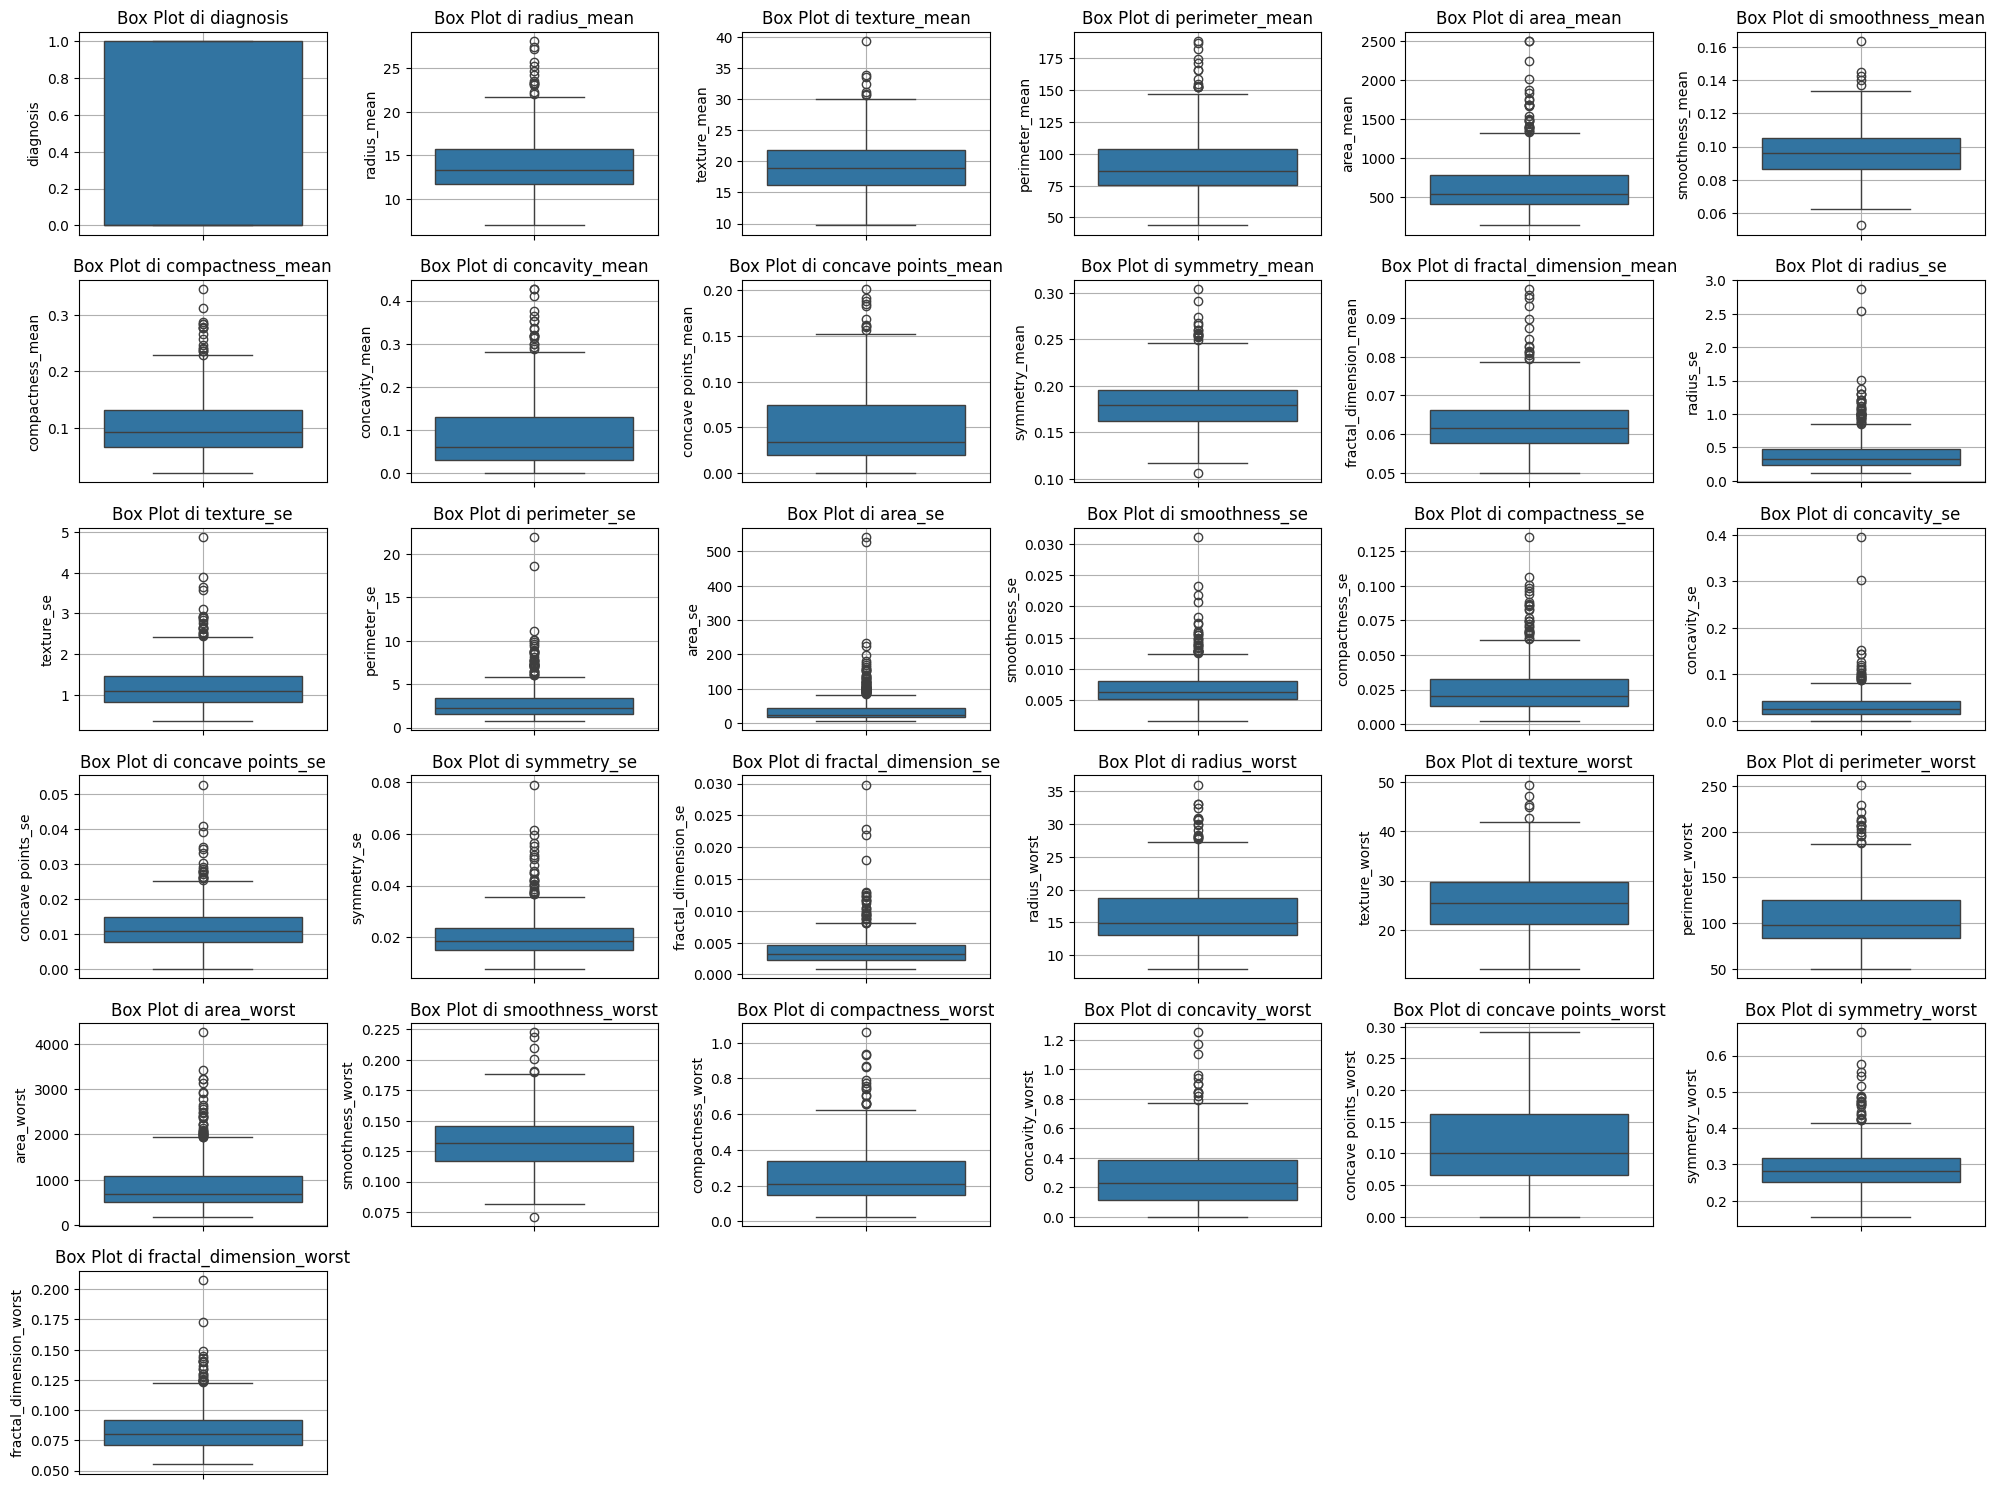

In [13]:
# 3. Box plots
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(6, 6, i+1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot di {column}')
    plt.grid(True)
plt.tight_layout()
plt.show()

ANALISI MULTIVARIANTE



L'analisi multivariante riguarda lo studio delle relazioni tra più variabili contemporaneamente, con particolare attenzione a come le caratteristiche numeriche influenzano il prezzo.

In [14]:
# Calcolo della matrice di correlazione
correlation_matrix = numeric_data.corr()
correlation_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


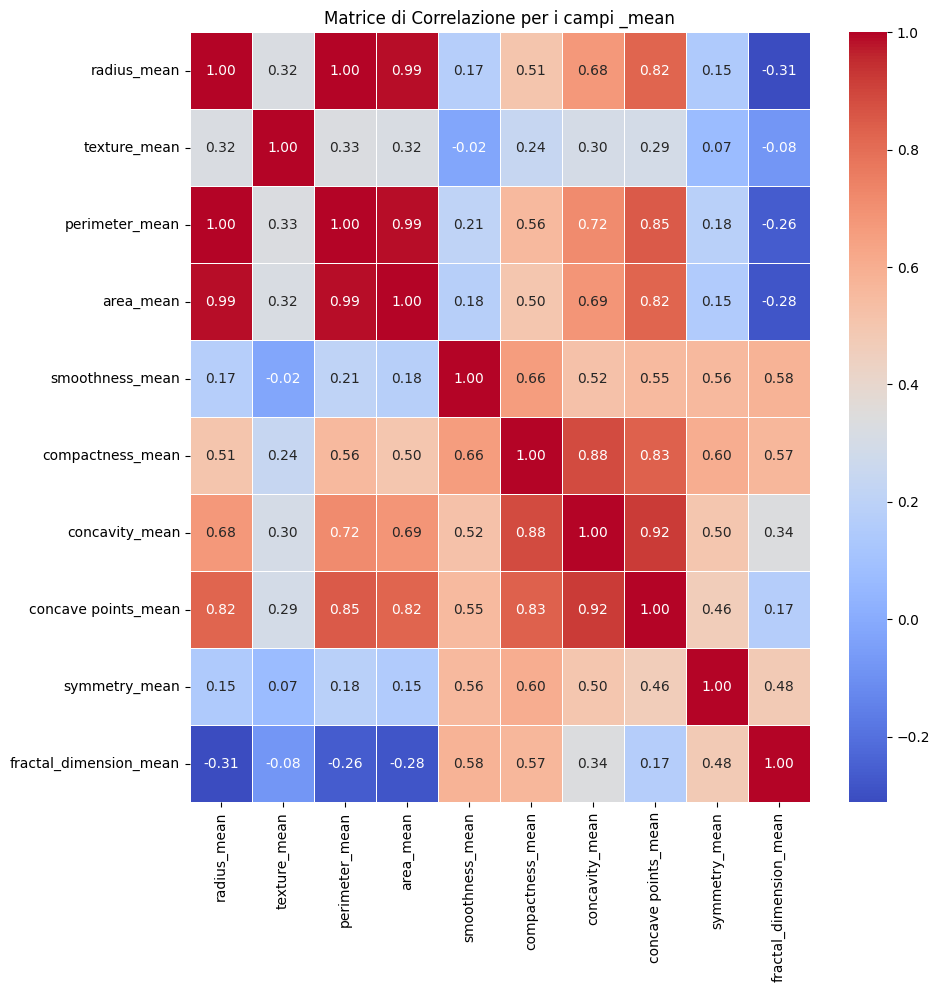

In [15]:
# Filtra le colonne in base ai suffissi
mean_columns = [col for col in df.columns if col.endswith('_mean')]
worst_columns = [col for col in df.columns if col.endswith('_worst')]
se_columns = [col for col in df.columns if col.endswith('_se')]

# Crea una funzione per generare la heatmap
def plot_heatmap(columns, title):
    correlation_matrix = df[columns].corr()  # Calcola la matrice di correlazione
    plt.figure(figsize=(10, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title)
    plt.show()

# Heatmap per i campi '_mean'
plot_heatmap(mean_columns, 'Matrice di Correlazione per i campi _mean')

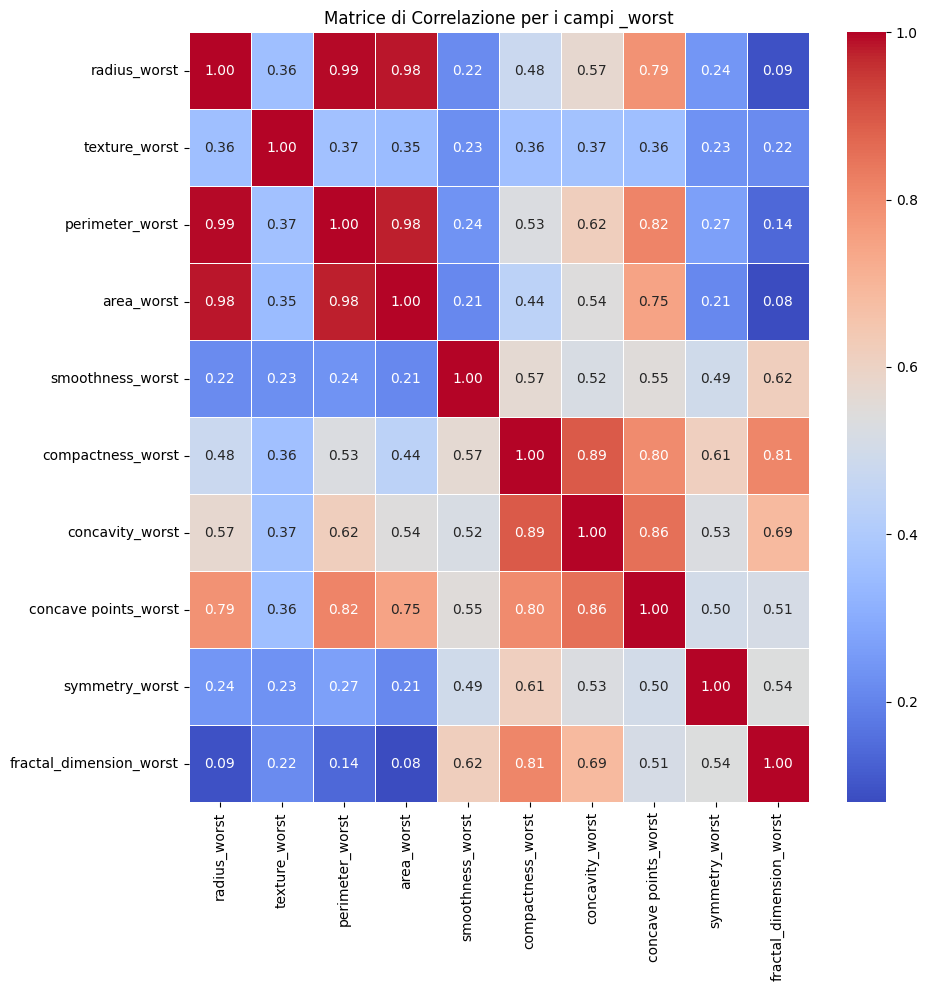

In [16]:
# Heatmap per i campi '_worst'
plot_heatmap(worst_columns, 'Matrice di Correlazione per i campi _worst')

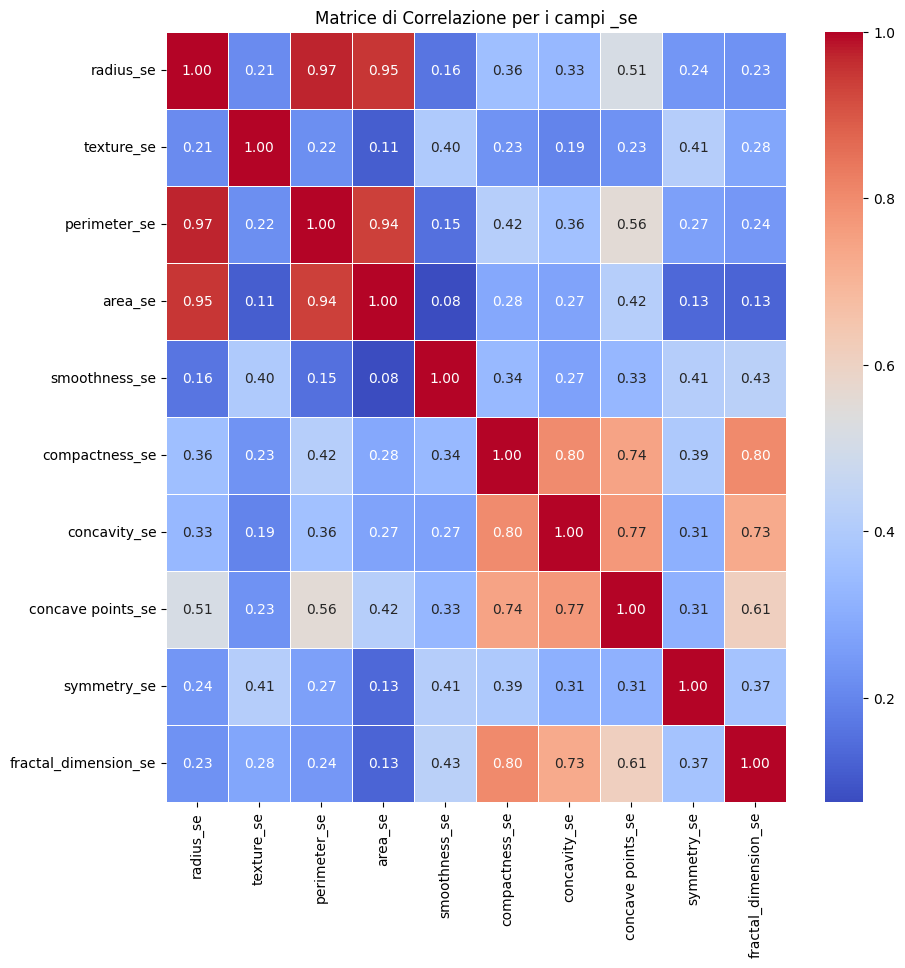

In [17]:
# Heatmap per i campi '_se'
plot_heatmap(se_columns, 'Matrice di Correlazione per i campi _se')

In [18]:
# Correlazione con il target
correlation_with_target = correlation_matrix['diagnosis'].drop('diagnosis')
print("\nCorrelazione delle features con la diagnosi PCOS:")
print(correlation_with_target)


Correlazione delle features con la diagnosi PCOS:
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_wor

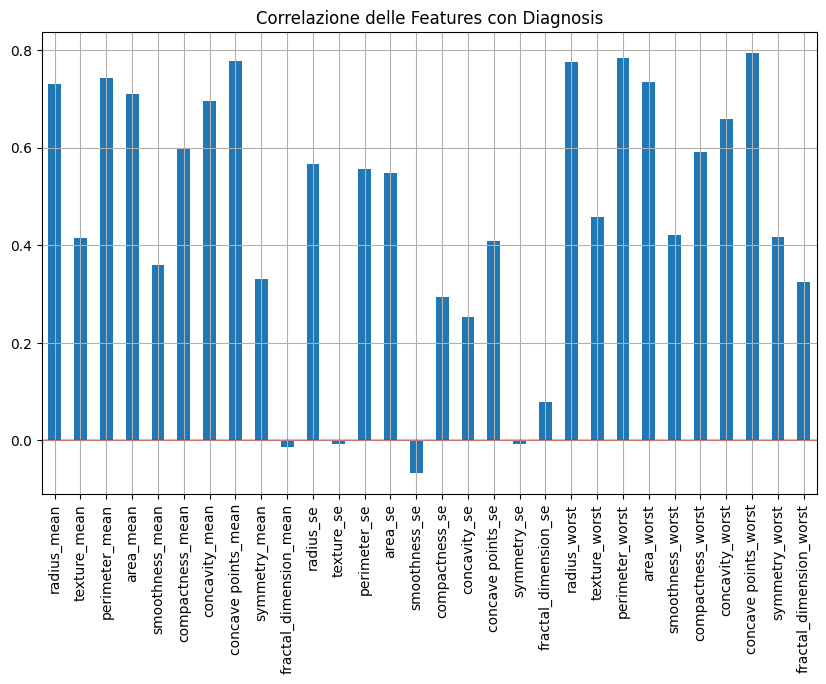

In [19]:
# Visualizzazione grafica delle correlazioni con il target
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar')
plt.title('Correlazione delle Features con Diagnosis')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(True)
plt.show()

APPLICAZIONE PCA

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
numeric_data = numeric_data.drop(['diagnosis'], axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [21]:
# Applicazione della PCA
pca = PCA().fit(scaled_data)

# Varianza spiegata
print("\nVarianza spiegata da ciascuna componente:")
print(pca.explained_variance_ratio_)

print("\nVarianza cumulativa spiegata:")
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)


Varianza spiegata da ciascuna componente:
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]

Varianza cumulativa spiegata:
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


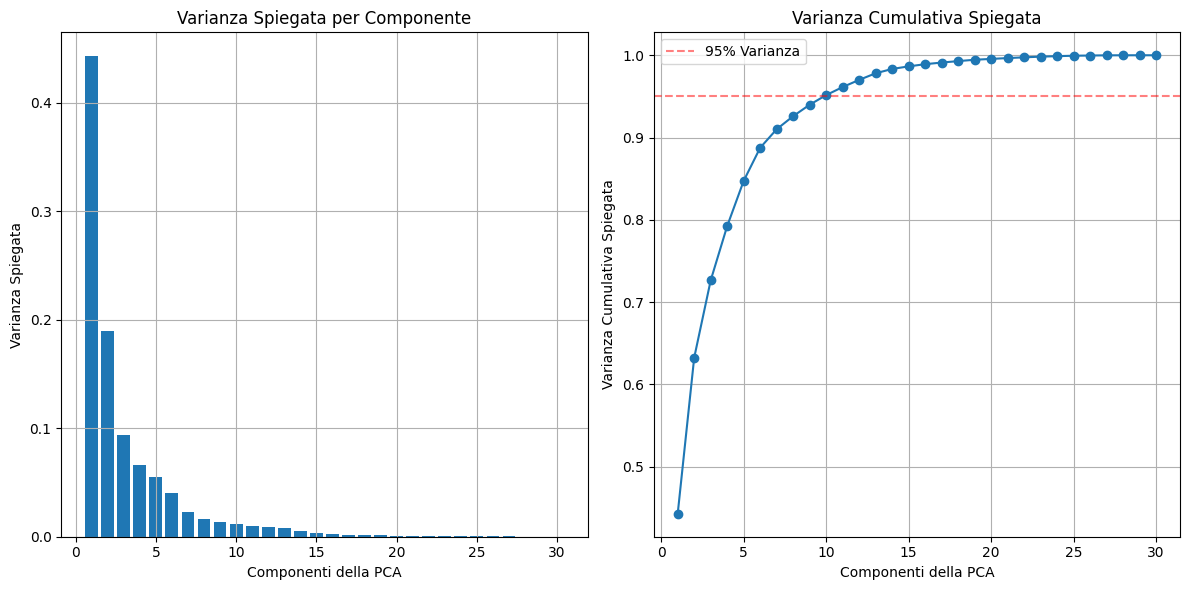

In [22]:
# Visualizzazione della varianza spiegata
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza Spiegata')
plt.title('Varianza Spiegata per Componente')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.5, label='95% Varianza')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza Cumulativa Spiegata')
plt.title('Varianza Cumulativa Spiegata')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [23]:
# Determinare il numero di componenti necessarie per spiegare il 95% della varianza
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1 # Prima componente che supera il 95%
print(f"\nNumero di componenti necessarie per spiegare il 95% della varianza: {n_components_95}")


Numero di componenti necessarie per spiegare il 95% della varianza: 10


Prepariamo il dataset per applicare i modelli

In [24]:
from sklearn.model_selection import train_test_split
# Seleziona feature e target
X = df.drop(['diagnosis'], axis=1)  # Rimuovi la variabile target
y = df['diagnosis']  # Variabile target

#dividiamo il dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Manteniamo una copia dei dati originali (non standardizzati)
X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [25]:
# Standardiziamo il dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applichiamo la PCA
pca = PCA()
pca.fit(X_train_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1

# Applica la trasformazione PCA con i componenti selezionati
pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

RETE NEURALE

 Le Reti Neurali sono modelli di apprendimento supervisionato, il che significa
 che vengono addestrate su un dataset di esempi etichettati, dove sia gli input
 che gli output desiderati sono noti. Durante la fase di addestramento, la rete
 neurale impara a mappare gli input agli output corrispondenti, aggiustando i
 pesi delle connessioni tra i nodi per minimizzare l’errore tra l’output previsto e l’output desiderato.

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

def create_and_train_model(X_train, y_train, X_test, y_test):
  # Definisci l'architettura del modello di rete neurale
  model = Sequential()
  model.add(Dense(20, input_shape=(X_train.shape[1],), activation="relu"))
  # Per classificazione binaria, usa 1 neurone di output con attivazione sigmoid
  model.add(Dense(1, activation="sigmoid"))  # Output: probabilità di avere diabete
  # Compila il modello
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
  model.summary()
  print("\n")

  # Addestramento del modello
  history = model.fit(
      X_train, y_train,
      epochs=50,
      batch_size=10,
      validation_data=(X_test, y_test),
      verbose=2
  )
  return model, history

In [27]:
# Addestra la rete neurale sui dati originali
model_original, history_original = create_and_train_model(X_train_original, y_train, X_test_original, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/50
40/40 - 1s - 24ms/step - accuracy: 0.3467 - loss: 39.4340 - val_accuracy: 0.3977 - val_loss: 17.0861
Epoch 2/50
40/40 - 0s - 8ms/step - accuracy: 0.2513 - loss: 10.7157 - val_accuracy: 0.1579 - val_loss: 7.2566
Epoch 3/50
40/40 - 0s - 5ms/step - accuracy: 0.2814 - loss: 4.8952 - val_accuracy: 0.4211 - val_loss: 2.3703
Epoch 4/50
40/40 - 0s - 8ms/step - accuracy: 0.5704 - loss: 2.0118 - val_accuracy: 0.7895 - val_loss: 0.4637
Epoch 5/50
40/40 - 0s - 7ms/step - accuracy: 0.8065 - loss: 0.5391 - val_accuracy: 0.8655 - val_loss: 0.3745
Epoch 6/50
40/40 - 0s - 8ms/step - accuracy: 0.8417 - loss: 0.4352 - val_accuracy: 0.9064 - val_loss: 0.2307
Epoch 7/50
40/40 - 0s - 8ms/step - accuracy: 0.8618 - loss: 0.3720 - val_accuracy: 0.9006 - val_loss: 0.2862
Epoch 8/50
40/40 - 0s - 3ms/step - accuracy: 0.8442 - loss: 0.3802 - val_accuracy: 0.9474 - val_loss: 0.1482
Epoch 9/50
40/40 - 0s - 4ms/step - accuracy: 0.8920 - loss: 0.2633 - val_accuracy: 0.9298 - val_loss: 0.1550
Epoch 10/50
4

In [28]:
# Addestra la rete neurale su dati PCA ridotti
model_pca, history_pca = create_and_train_model(X_train_pca, y_train, X_test_pca, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)



Epoch 1/50
40/40 - 1s - 25ms/step - accuracy: 0.5729 - loss: 0.7543 - val_accuracy: 0.6667 - val_loss: 0.6301
Epoch 2/50
40/40 - 0s - 4ms/step - accuracy: 0.7538 - loss: 0.5216 - val_accuracy: 0.8596 - val_loss: 0.4417
Epoch 3/50
40/40 - 0s - 5ms/step - accuracy: 0.8794 - loss: 0.3829 - val_accuracy: 0.9240 - val_loss: 0.3293
Epoch 4/50
40/40 - 0s - 7ms/step - accuracy: 0.9296 - loss: 0.2988 - val_accuracy: 0.9591 - val_loss: 0.2608
Epoch 5/50
40/40 - 0s - 8ms/step - accuracy: 0.9472 - loss: 0.2444 - val_accuracy: 0.9649 - val_loss: 0.2178
Epoch 6/50
40/40 - 0s - 8ms/step - accuracy: 0.9573 - loss: 0.2085 - val_accuracy: 0.9649 - val_loss: 0.1866
Epoch 7/50
40/40 - 0s - 5ms/step - accuracy: 0.9573 - loss: 0.1812 - val_accuracy: 0.9649 - val_loss: 0.1637
Epoch 8/50
40/40 - 0s - 6ms/step - accuracy: 0.9598 - loss: 0.1612 - val_accuracy: 0.9649 - val_loss: 0.1461
Epoch 9/50
40/40 - 0s - 7ms/step - accuracy: 0.9673 - loss: 0.1452 - val_accuracy: 0.9649 - val_loss: 0.1330
Epoch 10/50
40/4

In [29]:
# Vlutiamo entrambi i modelli
y_pred_original = (model_original.predict(X_test_scaled) > 0.5).astype(int)
y_pred_pca = (model_pca.predict(X_test_pca) > 0.5).astype(int)

# Calcoliamo le metriche
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy with original data: {accuracy_original:.4f}")
print(f"Accuracy with PCA-reduced data: {accuracy_pca:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Accuracy with original data: 0.8538
Accuracy with PCA-reduced data: 0.9766


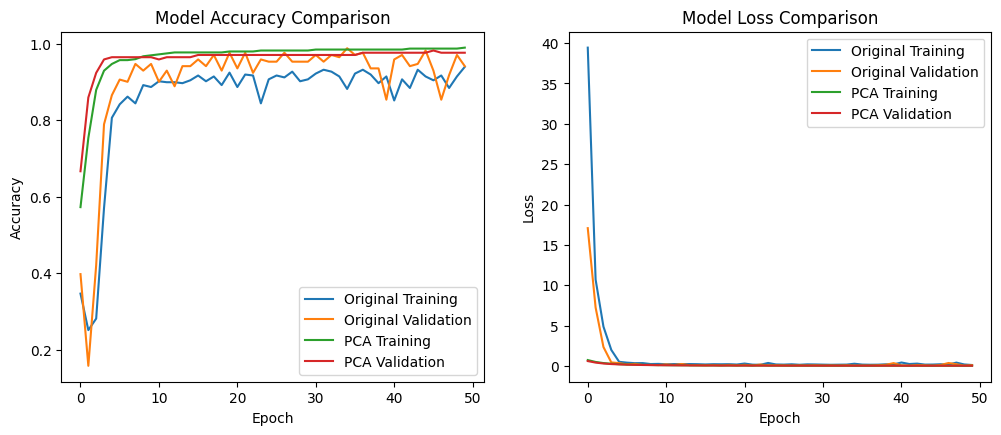

In [30]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(history_original.history['accuracy'], label='Original Training')
plt.plot(history_original.history['val_accuracy'], label='Original Validation')
plt.plot(history_pca.history['accuracy'], label='PCA Training')
plt.plot(history_pca.history['val_accuracy'], label='PCA Validation')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(2, 2, 2)
plt.plot(history_original.history['loss'], label='Original Training')
plt.plot(history_original.history['val_loss'], label='Original Validation')
plt.plot(history_pca.history['loss'], label='PCA Training')
plt.plot(history_pca.history['val_loss'], label='PCA Validation')
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

Dall'analisi delle curve di perdita e di accuratezza, insieme al confronto dei valori di accuracy ottenuti dai due modelli (uno addestrato su un dataset con PCA applicata e l'altro senza PCA), abbiamo concluso che il modello più efficiente è quello addestrato con l'applicazione della PCA.

Il salto da 84% a 98% è molto alto, quindi è bene capire cosa è successo. Ecco alcune possibili spiegazioni:
- Effetto della standardizzazione: Le reti neurali sono molto sensibili alla scala dei dati. Se i dati grezzi avevano scale molto diverse, lo standard scaler ha potuto migliorare la convergenza del modello.

In [31]:
# Predizioni (probabilità di avere tumore)
y_pred_train_prob = model_pca.predict(X_train_pca).flatten()
# Convertiamo le probabilità in predizioni binarie (0 o 1) usando soglia 0.5
y_pred_train = (y_pred_train_prob > 0.5).astype(int)

y_pred_test_prob = model_pca.predict(X_test_pca).flatten()
# Convertiamo le probabilità in predizioni binarie (0 o 1) usando soglia 0.5
y_pred_test = (y_pred_test_prob > 0.5).astype(int)

# Report di classificazione per i set di training e test
print("\nReport di Classificazione - Set di Training:")
print(classification_report(y_train, y_pred_train,
                         target_names=['Benigno', 'Maligno']))

print("\nReport di Classificazione - Set di Test:")
print(classification_report(y_test, y_pred_test,
                         target_names=['Benigno', 'Maligno']))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Report di Classificazione - Set di Training:
              precision    recall  f1-score   support

     Benigno       0.99      1.00      0.99       249
     Maligno       0.99      0.98      0.99       149

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398


Report di Classificazione - Set di Test:
              precision    recall  f1-score   support

     Benigno       0.98      0.98      0.98       108
     Maligno       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



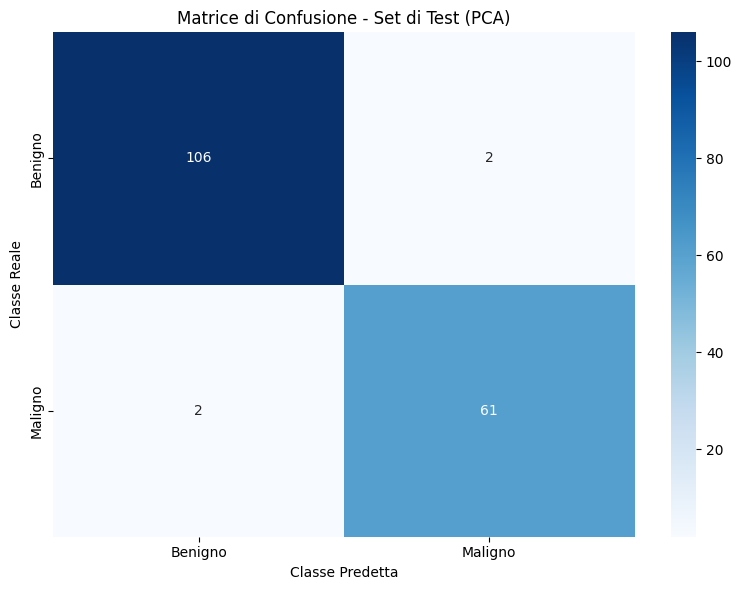

In [32]:
# Matrice di confusione per il set di test
plt.figure(figsize=(8, 6))
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.title('Matrice di Confusione - Set di Test (PCA)')
plt.ylabel('Classe Reale')
plt.xlabel('Classe Predetta')
plt.tight_layout()
plt.show()

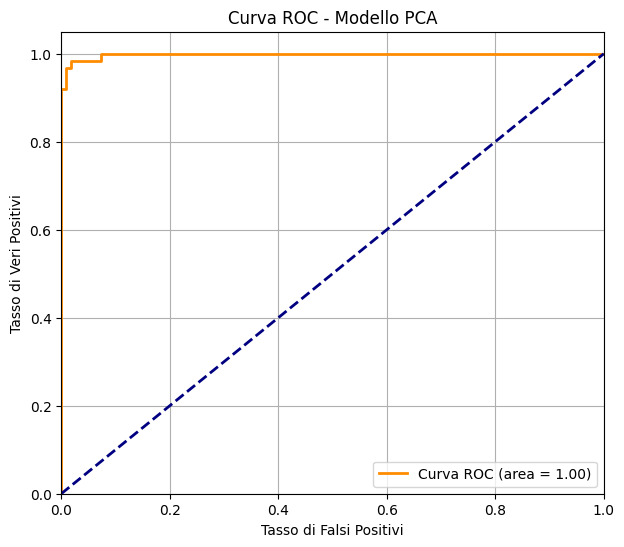

In [33]:
# Calcolo della curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)
roc_auc = auc(fpr, tpr)

# Visualizzazione della curva ROC
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasso di Falsi Positivi')
plt.ylabel('Tasso di Veri Positivi')
plt.title('Curva ROC - Modello PCA')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [34]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import scipy.stats as st

# Parametri per la cross-validation
n_fold = 10

# StratifiedKFold
stratified_folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
accuracy_stratified = []

# Preparazione dei dati
X_scaled = scaler.transform(X)  # Utilizziamo lo stesso scaler già addestrato
X_pca = pca.transform(X_scaled)  # Utilizziamo lo stesso PCA già addestrato

print("Esecuzione StratifiedKFold con modello PCA esistente...")
for fold, (train_idx, valid_idx) in enumerate(stratified_folds.split(X_pca, y)):
    # Estraiamo i dati di questo fold
    X_valid_fold = X_pca[valid_idx]
    y_valid_fold = y.iloc[valid_idx].values

    # Utilizziamo il modello già addestrato per fare predizioni
    y_pred_prob = model_pca.predict(X_valid_fold).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calcolo dell'accuratezza
    accuracy = accuracy_score(y_valid_fold, y_pred)
    accuracy_stratified.append(accuracy)

    print(f"Fold {fold+1}/{n_fold}: Accuracy = {accuracy:.4f}")

# Calcolo della media e dell'intervallo di confidenza
mean_stratified = np.mean(accuracy_stratified)

# Intervallo di confidenza al 90%
ci_stratified = st.t.interval(confidence=0.90, df=len(accuracy_stratified)-1,
                             loc=mean_stratified, scale=st.sem(accuracy_stratified))

print("\nRisultati finali (Modello PCA):")
print(f"StratifiedKFold Accuracy: {mean_stratified:.4f}, 90% CI: [{ci_stratified[0]:.4f}, {ci_stratified[1]:.4f}]")

Esecuzione StratifiedKFold con modello PCA esistente...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Fold 1/10: Accuracy = 0.9825
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold 2/10: Accuracy = 1.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold 3/10: Accuracy = 0.9825
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Fold 4/10: Accuracy = 0.9825
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold 5/10: Accuracy = 0.9825
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Fold 6/10: Accuracy = 0.9825
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Fold 7/10: Accuracy = 1.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Fold 8/10: Accuracy = 0.9649
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fold 9/10: Accuracy = 0.9825
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold 10/10: Accuracy = 1.0000

Risultati finali (Modello PCA):
StratifiedKFold Accuracy: 0.9860, 90% CI: [0.9795, 0.9924]


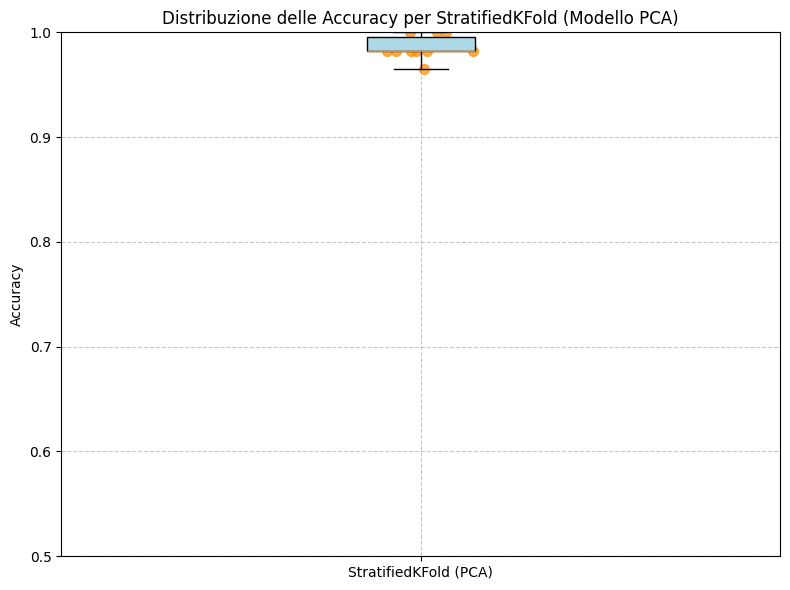

In [35]:
# Grafico della distribuzione dell'accuracy
plt.figure(figsize=(8, 6))

# Creazione del boxplot
plt.boxplot([accuracy_stratified], tick_labels=['StratifiedKFold (PCA)'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'))

# Sovrapporre i punti individuali
x = np.random.normal(1, 0.04, size=len(accuracy_stratified))
plt.scatter(x, accuracy_stratified, alpha=0.7, s=50, color='darkorange')

plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Accuracy')
plt.title('Distribuzione delle Accuracy per StratifiedKFold (Modello PCA)')
plt.ylim([min(min(accuracy_stratified) - 0.05, 0.5), 1.0])

plt.tight_layout()
plt.show()

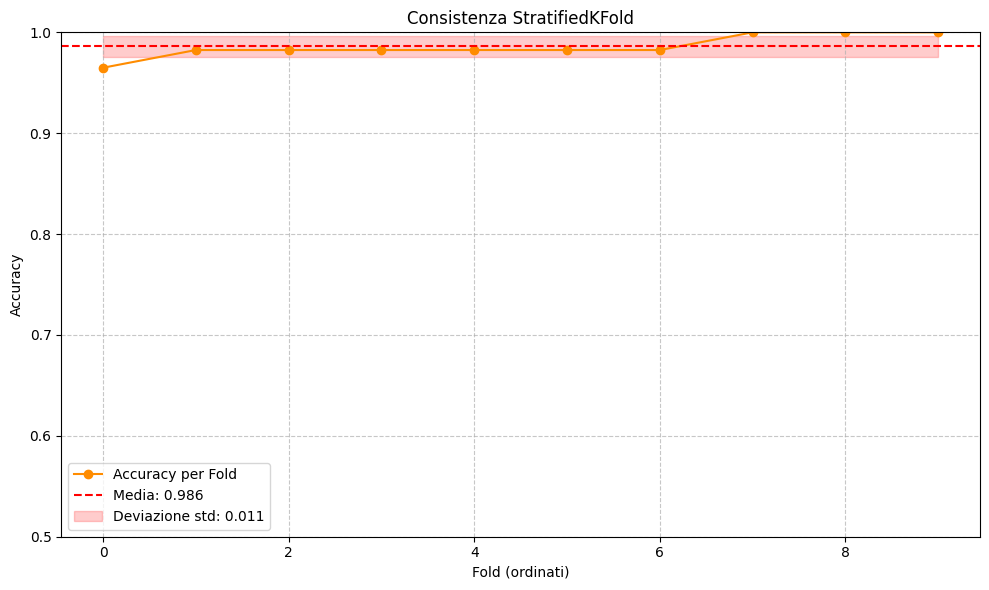

In [36]:
# Grafico di consistenza per Stratified K-Fold
plt.figure(figsize=(10, 6))
x_indices = np.arange(len(accuracy_stratified))
plt.plot(x_indices, sorted(accuracy_stratified), 'o-', label='Accuracy per Fold', color='darkorange')
plt.axhline(y=np.mean(accuracy_stratified), color='red', linestyle='--', label=f'Media: {np.mean(accuracy_stratified):.3f}')
plt.fill_between(x_indices, np.mean(accuracy_stratified) - np.std(accuracy_stratified),
                 np.mean(accuracy_stratified) + np.std(accuracy_stratified), alpha=0.2, color='red',
                 label=f'Deviazione std: {np.std(accuracy_stratified):.3f}')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Consistenza StratifiedKFold')
plt.xlabel('Fold (ordinati)')
plt.ylabel('Accuracy')
plt.ylim([min(min(accuracy_stratified) - 0.05, 0.5), 1.0])
plt.legend()

plt.tight_layout()
plt.show()

SVM

In [37]:
from sklearn.svm import SVC
from time import time

def create_train_SVM(X_train, y_train, dataset_name):
    # Creazione e addestramento del modello SVM
    print(f"\nCreazione e addestramento SVM su {dataset_name}:")
    start_time = time()
    svm_model = SVC(kernel="linear", probability=True, random_state=54)
    svm_model.fit(X_train, y_train)
    end_time = time()
    training_time = end_time - start_time

    print(f"Tempo di training: {training_time:.4f} secondi")

    return svm_model, training_time

# Creiamo e addestriamo i modelli SVM per i due dataset
svm_model_original, training_time_original = create_train_SVM(X_train_original, y_train, "Dati Grezzi")
svm_model_pca, training_time_pca = create_train_SVM(X_train_pca, y_train, "Dati PCA")


Creazione e addestramento SVM su Dati Grezzi:
Tempo di training: 8.5158 secondi

Creazione e addestramento SVM su Dati PCA:
Tempo di training: 0.0071 secondi


In [38]:
# Valutiamo entrambi i modelli
y_pred_original = svm_model_original.predict(X_test_original)
y_pred_pca = svm_model_pca.predict(X_test_pca)

# Calcoliamo le metriche
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy with original data: {accuracy_original:.4f}")
print(f"Accuracy with PCA-reduced data: {accuracy_pca:.4f}")
print(f"Differenza di accuracy: {abs(accuracy_original - accuracy_pca):.4f}")

Accuracy with original data: 0.9649
Accuracy with PCA-reduced data: 0.9883
Differenza di accuracy: 0.0234


In [39]:
# Confronto dei Support Vectors
n_support_original = sum(svm_model_original.n_support_)
n_support_pca = sum(svm_model_pca.n_support_)
print(f"\nNumero di Support Vectors (Dati Originali): {n_support_original}")
print(f"Numero di Support Vectors (Dati PCA): {n_support_pca}")


Numero di Support Vectors (Dati Originali): 48
Numero di Support Vectors (Dati PCA): 35


In [44]:
# Report di classificazione
print("\nReport di Classificazione - Dati Originali:")
print(classification_report(y_test, y_pred_original,
                            target_names=['Benigno', 'Maligno']))

print("\nReport di Classificazione - Dati PCA:")
print(classification_report(y_test, y_pred_pca,
                            target_names=['Benigno', 'Maligno']))


Report di Classificazione - Dati Originali:
              precision    recall  f1-score   support

     Benigno       0.96      0.98      0.97       108
     Maligno       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


Report di Classificazione - Dati PCA:
              precision    recall  f1-score   support

     Benigno       0.99      0.99      0.99       108
     Maligno       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



L'analisi dei risultati mostra che, sebbene la SVM addestrata sui dati ridotti con PCA ottenga una leggera miglioria in termini di accuracy (+2.34%), il costo computazionale per il training è drasticamente inferiore rispetto all'addestramento sui dati grezzi (0.0102s vs 11.2827s). Tuttavia, l'uso della PCA riduce anche il numero di support vectors (35 contro 48), il che suggerisce un modello più compatto ma non necessariamente migliore. Considerando che la differenza di accuracy è minima, mentre il costo computazionale della PCA è molto più elevato, conviene utilizzare la SVM sui dati grezzi per evitare il sovraccarico computazionale senza sacrificare significativamente le prestazioni.

In [46]:
# Predizioni (probabilità di avere tumore)
# Utilizziamo il modello sui dati grezzi per le predizioni di probabilità
y_pred_train_prob = svm_model_original.predict_proba(X_train_original)[:, 1]
# Convertiamo le probabilità in predizioni binarie (0 o 1) usando soglia 0.5
y_pred_train = (y_pred_train_prob > 0.5).astype(int)

y_pred_test_prob = svm_model_original.predict_proba(X_test_original)[:, 1]
# Convertiamo le probabilità in predizioni binarie (0 o 1) usando soglia 0.5
y_pred_test = (y_pred_test_prob > 0.5).astype(int)

# Report di classificazione per i set di training e test
print("\nReport di Classificazione - Set di Training:")
print(classification_report(y_train, y_pred_train,
                         target_names=['Benigno', 'Maligno']))

print("\nReport di Classificazione - Set di Test:")
print(classification_report(y_test, y_pred_test,
                         target_names=['Benigno', 'Maligno']))


Report di Classificazione - Set di Training:
              precision    recall  f1-score   support

     Benigno       0.96      0.99      0.97       249
     Maligno       0.98      0.93      0.95       149

    accuracy                           0.96       398
   macro avg       0.97      0.96      0.96       398
weighted avg       0.97      0.96      0.96       398


Report di Classificazione - Set di Test:
              precision    recall  f1-score   support

     Benigno       0.96      0.98      0.97       108
     Maligno       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



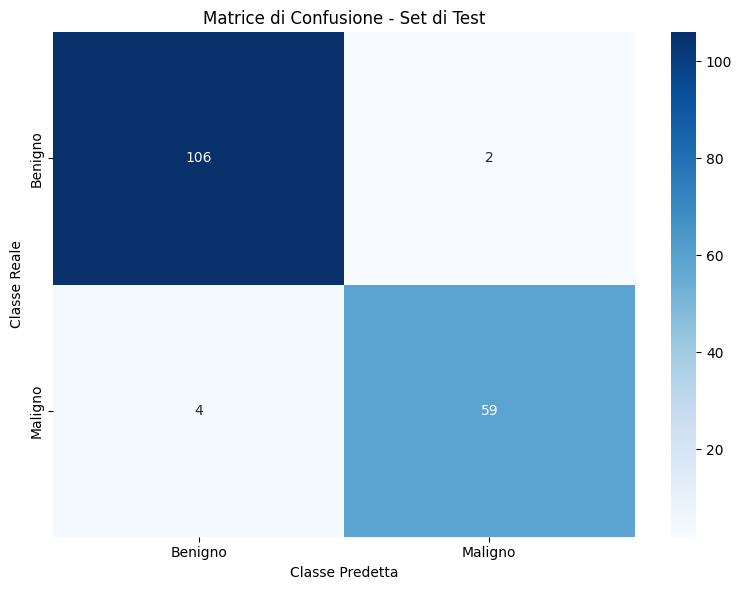

In [47]:
# Matrice di confusione per il set di test
plt.figure(figsize=(8, 6))
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.title('Matrice di Confusione - Set di Test')
plt.ylabel('Classe Reale')
plt.xlabel('Classe Predetta')
plt.tight_layout()
plt.show()

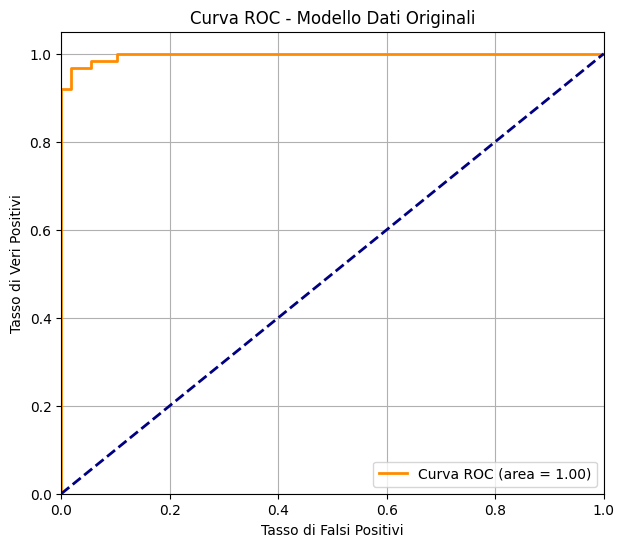

In [48]:
# Calcolo della curva ROC usando le probabilità del modello sui dati originali
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)
roc_auc = auc(fpr, tpr)

# Visualizzazione della curva ROC
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasso di Falsi Positivi')
plt.ylabel('Tasso di Veri Positivi')
plt.title('Curva ROC - Modello Dati Originali')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [52]:
n_fold = 10

# Preparazione dei dati - preserva i nomi delle colonne
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)

# StratifiedKFold
stratified_folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
accuracy_stratified = []

print("Esecuzione StratifiedKFold con modello sui dati originali...")
for fold, (train_idx, valid_idx) in enumerate(stratified_folds.split(X_scaled, y)):
    # Estraiamo i dati di questo fold
    X_valid_fold = X_scaled.iloc[valid_idx]
    y_valid_fold = y.iloc[valid_idx].values

    # Utilizziamo il modello SVM sui dati originali per fare predizioni
    y_pred_prob = svm_model_original.predict_proba(X_valid_fold)[:, 1]
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calcolo dell'accuratezza
    accuracy = accuracy_score(y_valid_fold, y_pred)
    accuracy_stratified.append(accuracy)

    print(f"Fold {fold+1}/{n_fold}: Accuracy = {accuracy:.4f}")

# Calcolo della media e dell'intervallo di confidenza
mean_stratified = np.mean(accuracy_stratified)

# Intervallo di confidenza al 90%
ci_stratified = st.t.interval(confidence=0.90, df=len(accuracy_stratified)-1,
                             loc=mean_stratified, scale=st.sem(accuracy_stratified))

print("\nRisultati finali (Modello Dati Originali):")
print(f"StratifiedKFold Accuracy: {mean_stratified:.4f}, 90% CI: [{ci_stratified[0]:.4f}, {ci_stratified[1]:.4f}]")

Esecuzione StratifiedKFold con modello sui dati originali...
Fold 1/10: Accuracy = 0.6140
Fold 2/10: Accuracy = 0.6140
Fold 3/10: Accuracy = 0.6316
Fold 4/10: Accuracy = 0.6842
Fold 5/10: Accuracy = 0.6491
Fold 6/10: Accuracy = 0.6316
Fold 7/10: Accuracy = 0.6316
Fold 8/10: Accuracy = 0.6316
Fold 9/10: Accuracy = 0.6316
Fold 10/10: Accuracy = 0.6250

Risultati finali (Modello Dati Originali):
StratifiedKFold Accuracy: 0.6344, 90% CI: [0.6227, 0.6461]


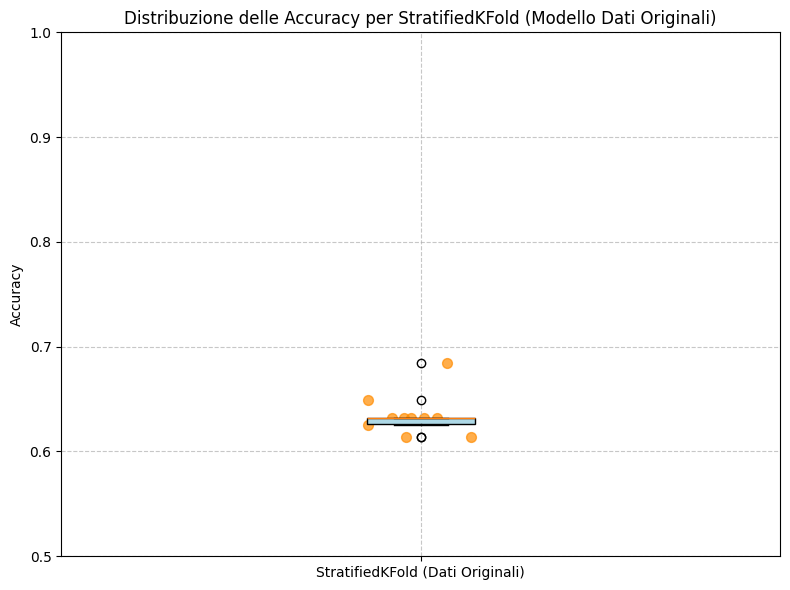

In [53]:
# Grafico della distribuzione dell'accuracy
plt.figure(figsize=(8, 6))

# Creazione del boxplot
plt.boxplot([accuracy_stratified], tick_labels=['StratifiedKFold (Dati Originali)'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'))

# Sovrapporre i punti individuali
x = np.random.normal(1, 0.04, size=len(accuracy_stratified))
plt.scatter(x, accuracy_stratified, alpha=0.7, s=50, color='darkorange')

plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Accuracy')
plt.title('Distribuzione delle Accuracy per StratifiedKFold (Modello Dati Originali)')
plt.ylim([min(min(accuracy_stratified) - 0.05, 0.5), 1.0])

plt.tight_layout()
plt.show()

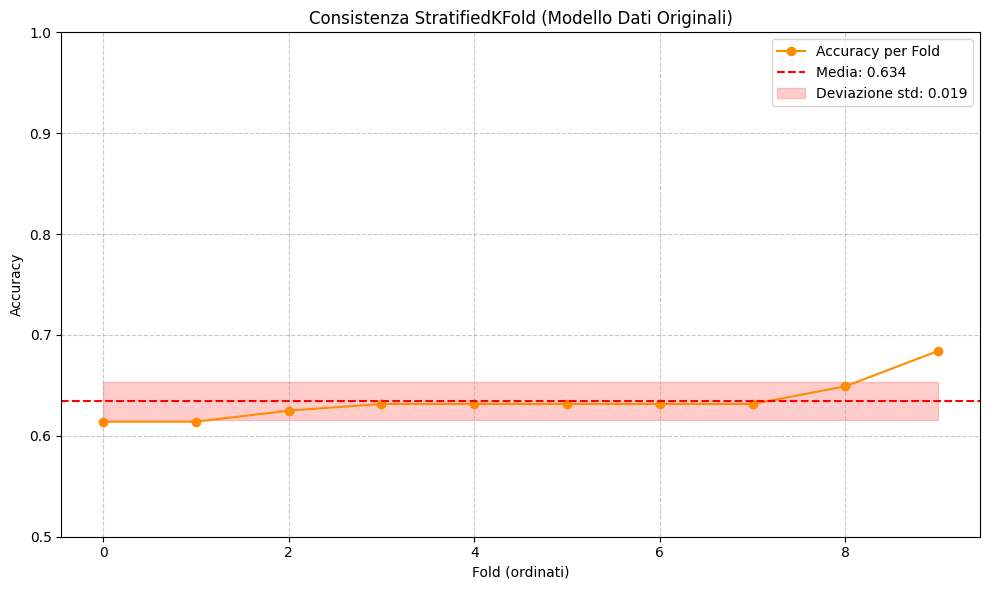

In [54]:
# Grafico di consistenza per Stratified K-Fold
plt.figure(figsize=(10, 6))
x_indices = np.arange(len(accuracy_stratified))
plt.plot(x_indices, sorted(accuracy_stratified), 'o-', label='Accuracy per Fold', color='darkorange')
plt.axhline(y=np.mean(accuracy_stratified), color='red', linestyle='--', label=f'Media: {np.mean(accuracy_stratified):.3f}')
plt.fill_between(x_indices, np.mean(accuracy_stratified) - np.std(accuracy_stratified),
                 np.mean(accuracy_stratified) + np.std(accuracy_stratified), alpha=0.2, color='red',
                 label=f'Deviazione std: {np.std(accuracy_stratified):.3f}')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Consistenza StratifiedKFold (Modello Dati Originali)')
plt.xlabel('Fold (ordinati)')
plt.ylabel('Accuracy')
plt.ylim([min(min(accuracy_stratified) - 0.05, 0.5), 1.0])
plt.legend()

plt.tight_layout()
plt.show()